<a href="https://colab.research.google.com/github/ArtConnoisseur/image-classification/blob/main/plastic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# !unzip '/content/drive/MyDrive/ml_code/cnn/plastic classification/archive.zip' -d '/content/drive/MyDrive/ml_code/cnn/plastic classification/dataset'

Archive:  /content/drive/MyDrive/ml_code/cnn/plastic classification/archive.zip
replace /content/drive/MyDrive/ml_code/cnn/plastic classification/dataset/solid_waste/black/glass/0 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: An
  inflating: /content/drive/MyDrive/ml_code/cnn/plastic classification/dataset/solid_waste/black/glass/0 (1).jpg  
  inflating: /content/drive/MyDrive/ml_code/cnn/plastic classification/dataset/solid_waste/black/glass/0 (10).jpg  
  inflating: /content/drive/MyDrive/ml_code/cnn/plastic classification/dataset/solid_waste/black/glass/0 (100).jpg  
  inflating: /content/drive/MyDrive/ml_code/cnn/plastic classification/dataset/solid_waste/black/glass/0 (101).jpg  
  inflating: /content/drive/MyDrive/ml_code/cnn/plastic classification/dataset/solid_waste/black/glass/0 (102).jpg  
  inflating: /content/drive/MyDrive/ml_code/cnn/plastic classification/dataset/solid_waste/black/glass/0 (103).jpg  
  inflating: /content/drive/MyDrive/ml_code/cnn/plastic classification/

In [ ]:
import os
import shutil

In [ ]:
# source_dir = '/content/drive/MyDrive/ml_code/cnn/plastic classification/dataset/solid_waste'
# destination_dir = '/content/drive/MyDrive/ml_code/cnn/plastic classification/dataset_real'

# categories = {'plastic': '2', 'glass': '0', 'metal': '1'}
# for category in categories:
#     os.makedirs(os.path.join(destination_dir, category), exist_ok=True)

# # Initialize counters for unique IDs
# counter = {'plastic': 1, 'glass': 1, 'metal': 1}

# # Traverse through the dataset directory
# for color in os.listdir(source_dir):
#     color_dir = os.path.join(source_dir, color)
#     if os.path.isdir(color_dir):
#         # Go through each item (plastic, glass, metal) in the color folder
#         for item in os.listdir(color_dir):
#             item_path = os.path.join(color_dir, item)
#             if os.path.isdir(item_path):
#                 # Copy and rename each item (plastic, glass, metal) to the corresponding directory in dataset_real
#                 for file in os.listdir(item_path):
#                     file_path = os.path.join(item_path, file)
#                     if os.path.isfile(file_path):
#                         # Get the prefix and update the ID based on the current counter
#                         prefix = categories[item]
#                         new_name = f"{prefix} ({counter[item]}).jpg"  # Assuming image extension is .jpg
#                         new_path = os.path.join(destination_dir, item, new_name)

#                         # Copy the file to the new directory with the new name
#                         try:
#                             shutil.copy(file_path, new_path)
#                         except Exception as e:
#                             print(f"Error copying {file_path} to {new_path}: {e}")

#                         # Increment the counter for the current category
#                         counter[item] += 1

# print("Files have been organized, renamed, and copied to 'dataset_real' in your Google Drive.")

Files have been organized, renamed, and copied to 'dataset_real' in your Google Drive.


# Understanding the data

In [ ]:
datapath = '/content/drive/MyDrive/ml_code/cnn/plastic classification/dataset_real'

In [ ]:
counts = {}
for category in os.listdir(datapath):
  category_path = os.path.join(datapath, category)
  counts[category] = len(os.listdir(category_path))

print(counts)

{'plastic': 1641, 'glass': 1666, 'metal': 1655}


# data preprocessing

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

## applying feature scaling and data augmentation to train dataset

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = train_data_generator.flow_from_directory(
    datapath,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    seed=123
)



Found 3970 images belonging to 3 classes.


In [ ]:
print(train_data.class_indices)

{'glass': 0, 'metal': 1, 'plastic': 2}


## applying feature scaling to validation dataset

In [ ]:
test_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_data = test_data_generator.flow_from_directory(
    datapath,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    seed=123
)

Found 992 images belonging to 3 classes.


In [ ]:
print(test_data.class_indices)

{'glass': 0, 'metal': 1, 'plastic': 2}


# Building the CNN model

In [ ]:
from tensorflow.keras import layers, Sequential

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(1048, activation='relu'),

  layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, validation_data=test_data, epochs=30, batch_size=batch_size)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.4705 - loss: 0.9983 - val_accuracy: 0.6845 - val_loss: 0.7155
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 338s 3s/step - accuracy: 0.7566 - loss: 0.5998 - val_accuracy: 0.8690 - val_loss: 0.3184
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.8546 - loss: 0.3821 - val_accuracy: 0.8750 - val_loss: 0.2970
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8917 - loss: 0.2801 - val_accuracy: 0.8690 - val_loss: 0.2970
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.8736 - loss: 0.3343 - val_accuracy: 0.7792 - val_loss: 0.4871
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.8855 - loss: 0.2902 - val_accuracy: 0.8891 - val_loss: 0.2384
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9108 - loss: 0.2371 - val_accuracy: 0.9183 - val_loss: 0.2527
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.9171 - loss: 0.2325 - val_accuracy: 0.931

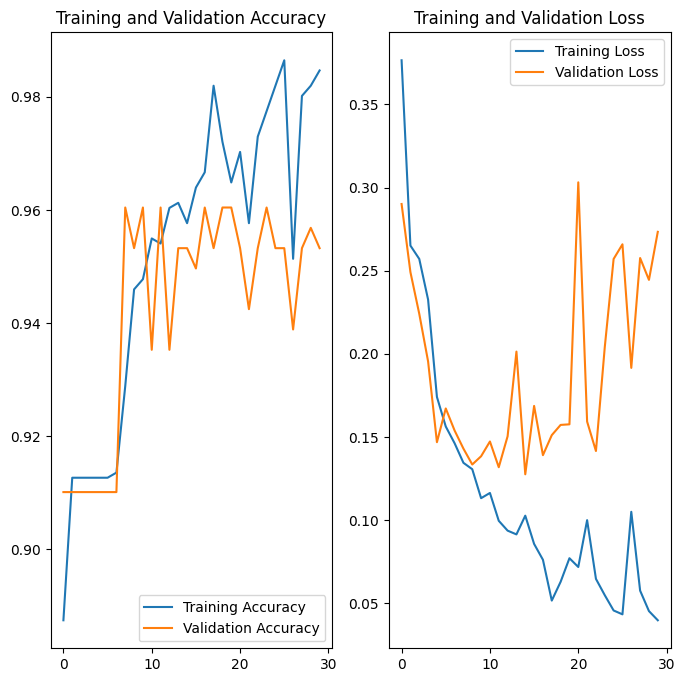

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()